In [8]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
import logging
import os
import glob
import sys
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import scipy as sp
# Local imports
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0])))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope")))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope/GNURadio")))
from radiotelescope.observations.observations import Observations as Obs
from radiotelescope.instruments import RTLSDRGNU
# Inicializando loggers
logger = logging.getLogger("radiotelescope")
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

In [2]:
#!jt -t monokai -f roboto -fs 10 -T -N
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

## FITs manual

In [3]:
filenames = glob.glob("../data/raw/GNURADIO/UIRAPURU*")
filenames[0]

'../data/raw/GNURADIO/UIRAPURU_L2_20230223_094831_59.fit'

In [16]:
len(filenames)

74

In [17]:
hdu = fits.open(filenames[0])
hdu.info()

Filename: ../data/raw/GNURADIO/UIRAPURU_L2_20230223_094831_59.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   (1024, 200)   float64   
  1                1 BinTableHDU     14   1R x 2C   [200D, 1024D]   


In [18]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                  200                                                  
EXTEND  =                    T                                                  
DATE    = '20230223'                                                            
CONTENT = 'Radio flux density - ../data/raw/GNURADIO/UIRAPURU_L2'               
ORIGIN  = 'PB      '                                                            
TELESCOP= '../data/raw/GNURADIO/UIRAPURU_L2'                                    
INSTRUME= '../data/raw/GNURADIO/UIRAPURU_L2'                                    
DATE-OBS= '20230223'                                                            
TIME-OBS= '094831.510585'   

In [24]:
dados = hdu[0].data
tempos = hdu[1].data[0][0]
freqs = hdu[1].data[0][1]
dados
tempos[0], tempos[-1]
freqs[0], freqs[-1]

array([[-100.47489929, -100.41560364, -100.32710266, ...,  -99.91940308,
        -100.0447998 , -100.30239868],
       [-100.4312973 , -100.68060303, -100.87449646, ..., -100.40139771,
        -100.56960297, -100.55139923],
       [-100.63760376, -100.67960358, -100.77050018, ..., -100.17890167,
        -100.42220306, -100.59380341],
       ...,
       [-100.74590302, -100.74849701, -100.584198  , ..., -100.3164978 ,
        -100.28540039, -100.49279785],
       [-100.41429901, -100.46269989, -100.63240051, ..., -100.28269958,
        -100.25700378, -100.43190002],
       [-100.19920349, -100.48770142, -100.64749908, ..., -100.40110016,
        -100.49939728, -100.32839966]])

(0.19568422995507717, 40.95100109791383)

(1224.5, 1229.5)

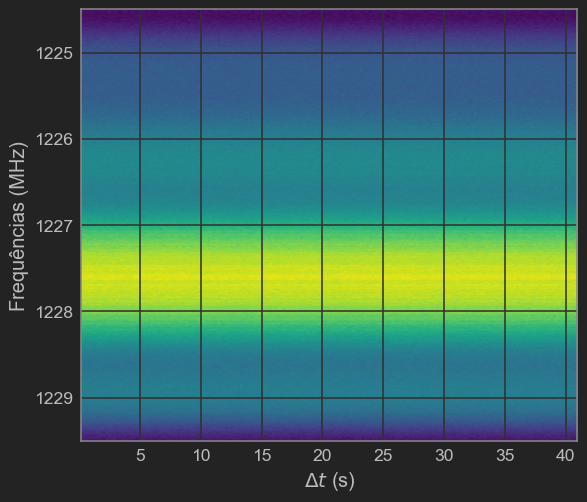

In [7]:
fig, ax = plt.subplots()
ax.imshow(dados.T, aspect="auto", extent=[tempos[0], tempos[-1], freqs[-1], freqs[0]])
ax.set_ylabel("Frequências (MHz)")
ax.set_xlabel(r"$\Delta t$ (s)")
plt.show();

## Usando Pacote Radiotelescope

In [13]:
RTLSDRGNU.instrument.name = "UIRAPURU"
RTLSDRGNU.instrument.name
RTLSDRGNU.instrument.Alt = 75
RTLSDRGNU.instrument.Az
RTLSDRGNU.instrument.lat
RTLSDRGNU.instrument.lon
RTLSDRGNU.instrument.elev

'UIRAPURU'

0

<Quantity -7.211637 deg>

<Quantity -35.908138 deg>

<Quantity 553. m>

In [14]:
fuso = RTLSDRGNU.instrument.timezone
begin = fuso.localize(pd.to_datetime("2023-02-23 00:00:00"))
obs = Obs(t_start=begin, duration=pd.Timedelta(24, unit="h"))
obs.backend = RTLSDRGNU
# Edite este nome com o prefixo que você usou no gnuradio.
RTLSDRGNU.name = "UIRAPURU_L2"
# Se necessário, altere esta variável para apontar para os seus dados.
obs.backend.controller.local_folder
# Carrega todas as observações feitas no período determinado com o prefixo indicado.
obs.load_observation(extension="fit")

'../data/raw/GNURADIO/'

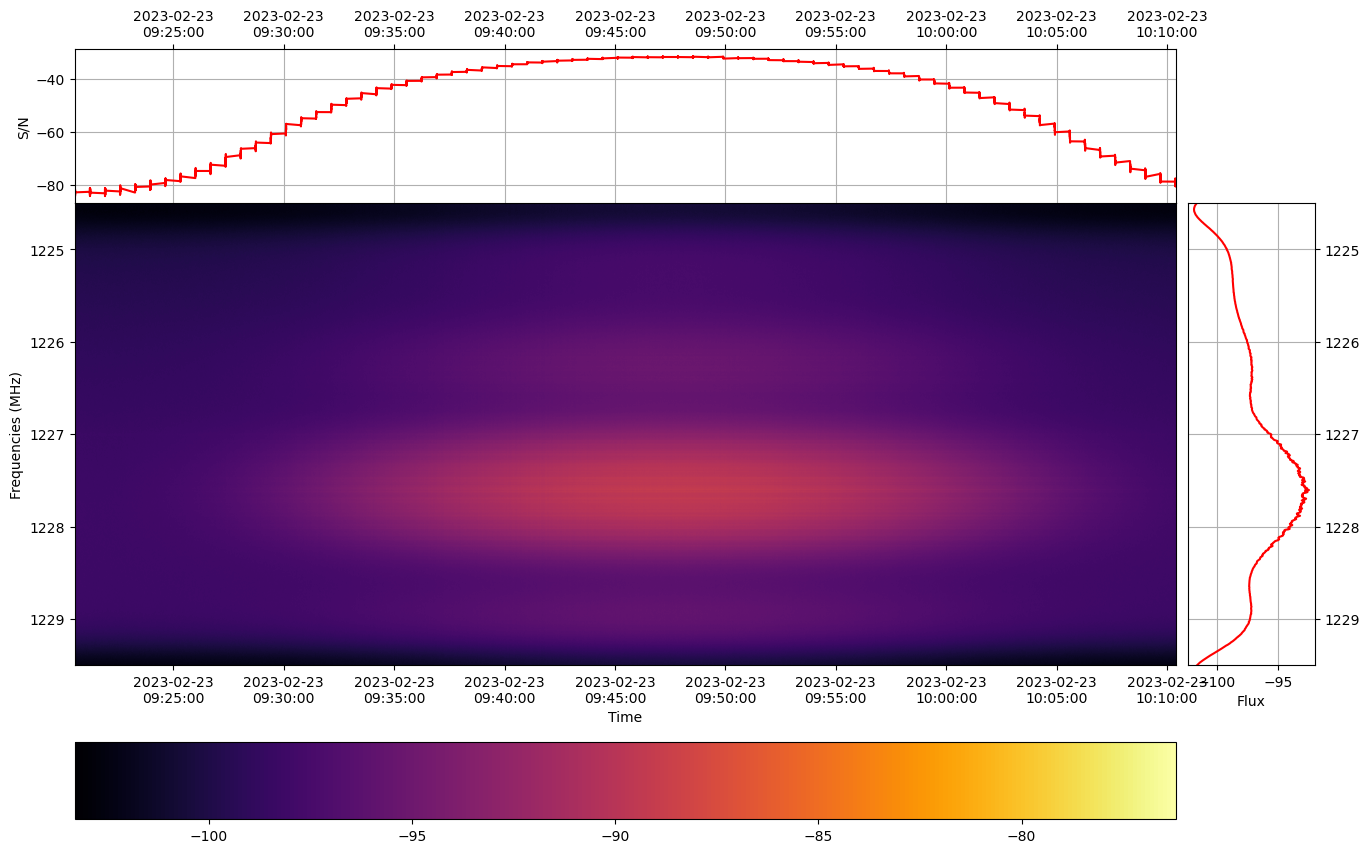

In [15]:
obs.plot_waterfall(obs.data);

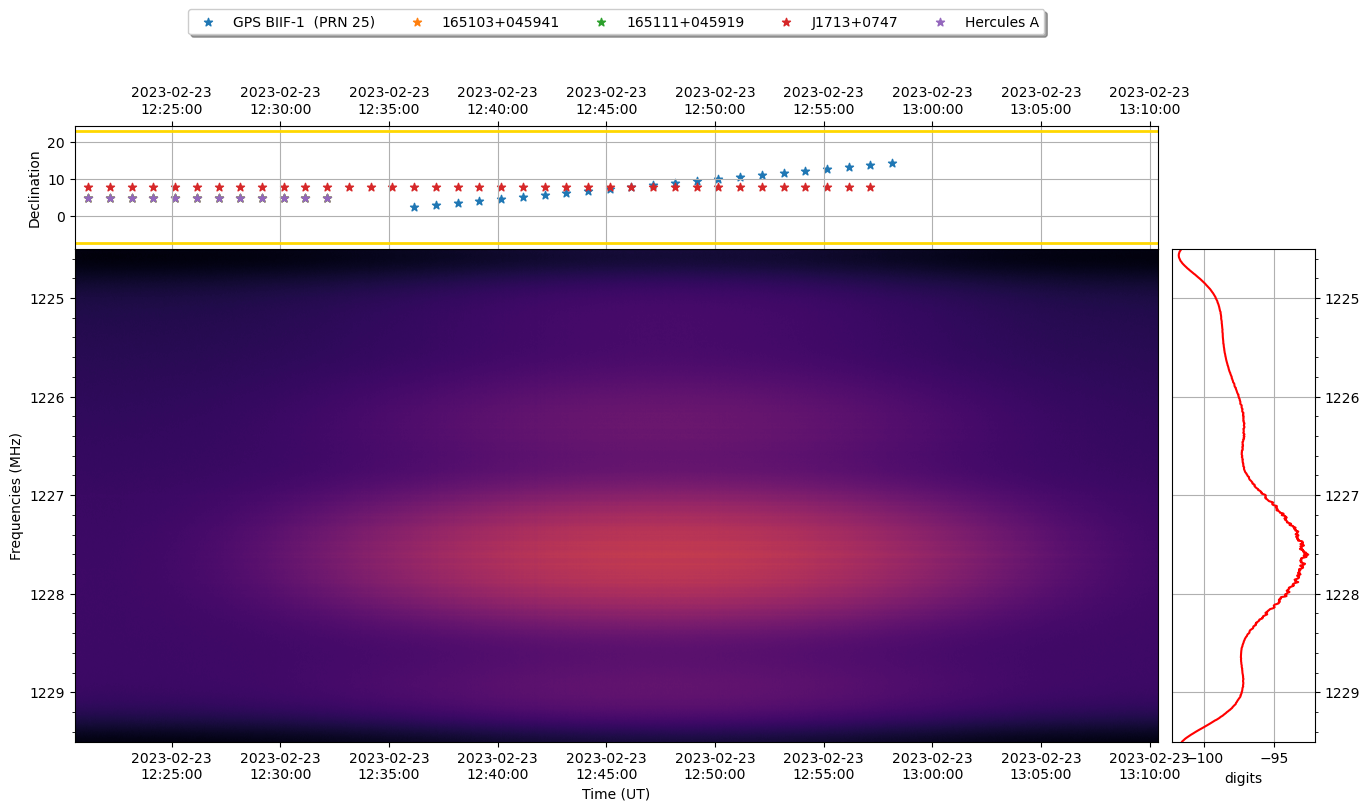

In [16]:
# Comparação do sinal recebido com objetos no céu.
obs.make_sky().sky.plot_timeseries(obs.data);

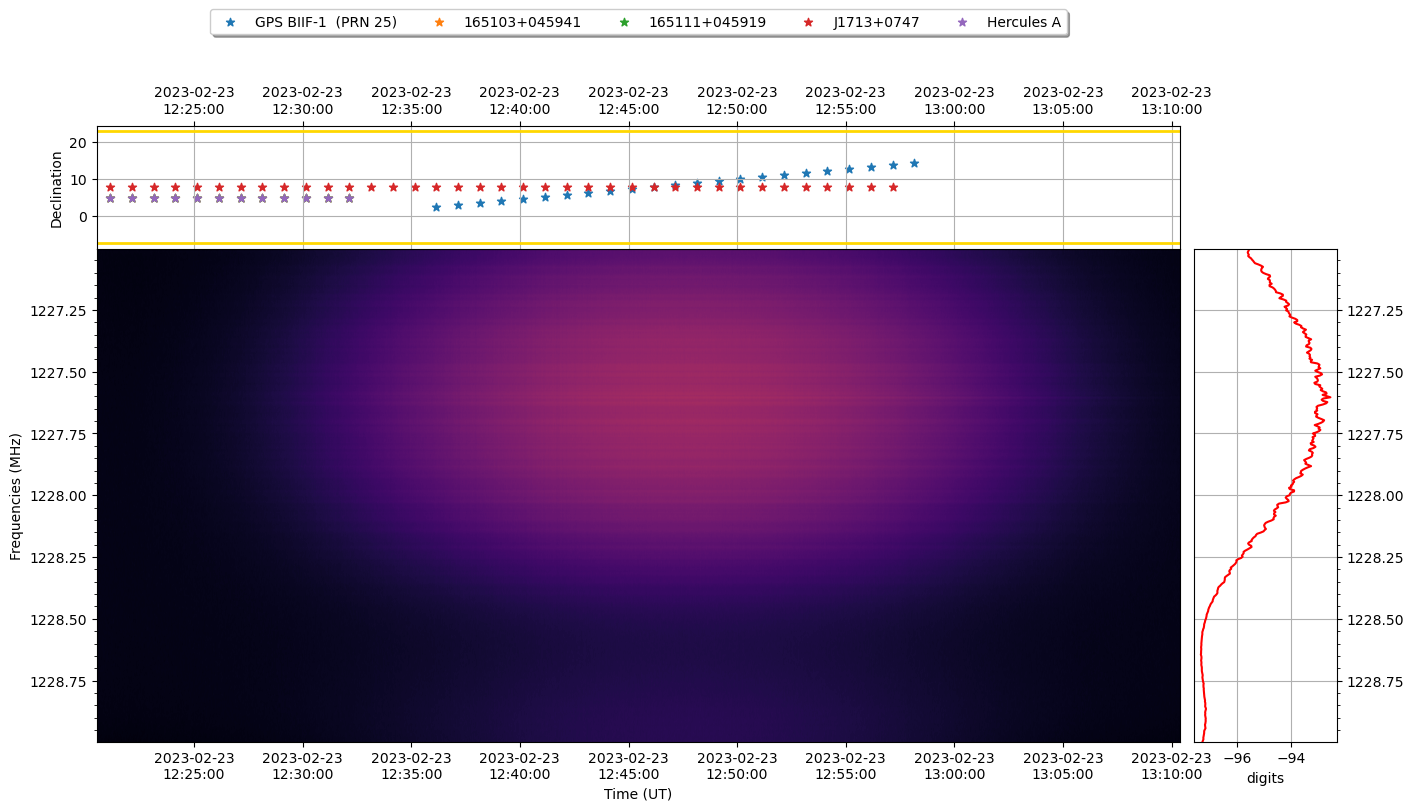

In [17]:
obs.sky.plot_timeseries(obs.filter_data(obs.data, freqs=[1227, 1229]));

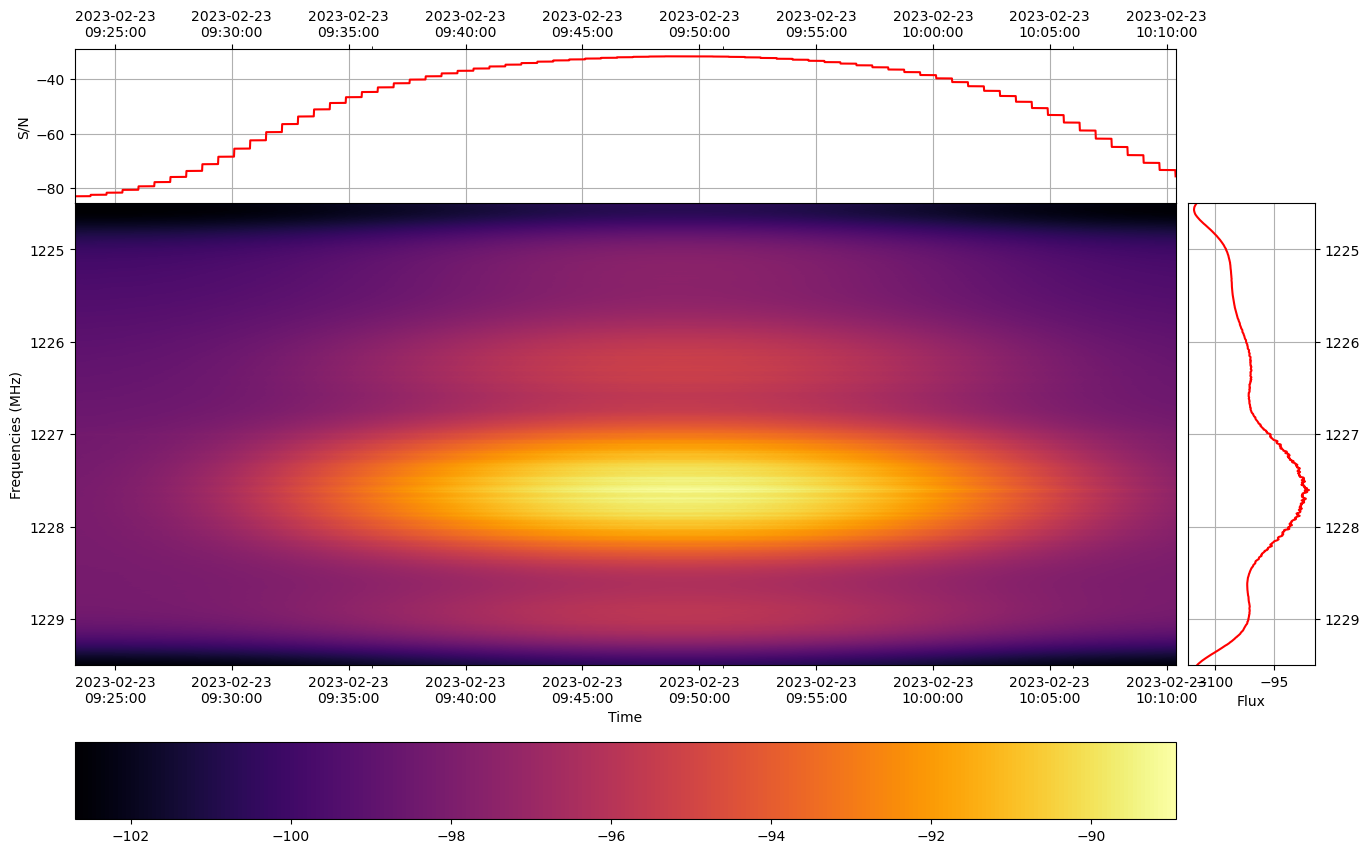

In [7]:
obs.plot_waterfall(obs.data.rolling(window=1000).mean().dropna());

In [ ]:
fuso = RTLSDRGNU.instrument.timezone
begin = fuso.localize(pd.to_datetime("2023-02-28 10:00:00"))
obs = Obs(t_start=begin, duration=pd.Timedelta(1, unit="h"))
obs.backend = RTLSDRGNU
# Edite este nome com o prefixo que você usou no gnuradio.
RTLSDRGNU.name = "UIRAPURU_1270"
# Se necessário, altere esta variável para apontar para os seus dados.
obs.backend.controller.local_folder
# Carrega todas as observações feitas no período determinado com o prefixo indicado.
obs.load_observation(extension="fit")

'../data/raw/GNURADIO/'

In [ ]:
obs.plot_waterfall(obs.data);

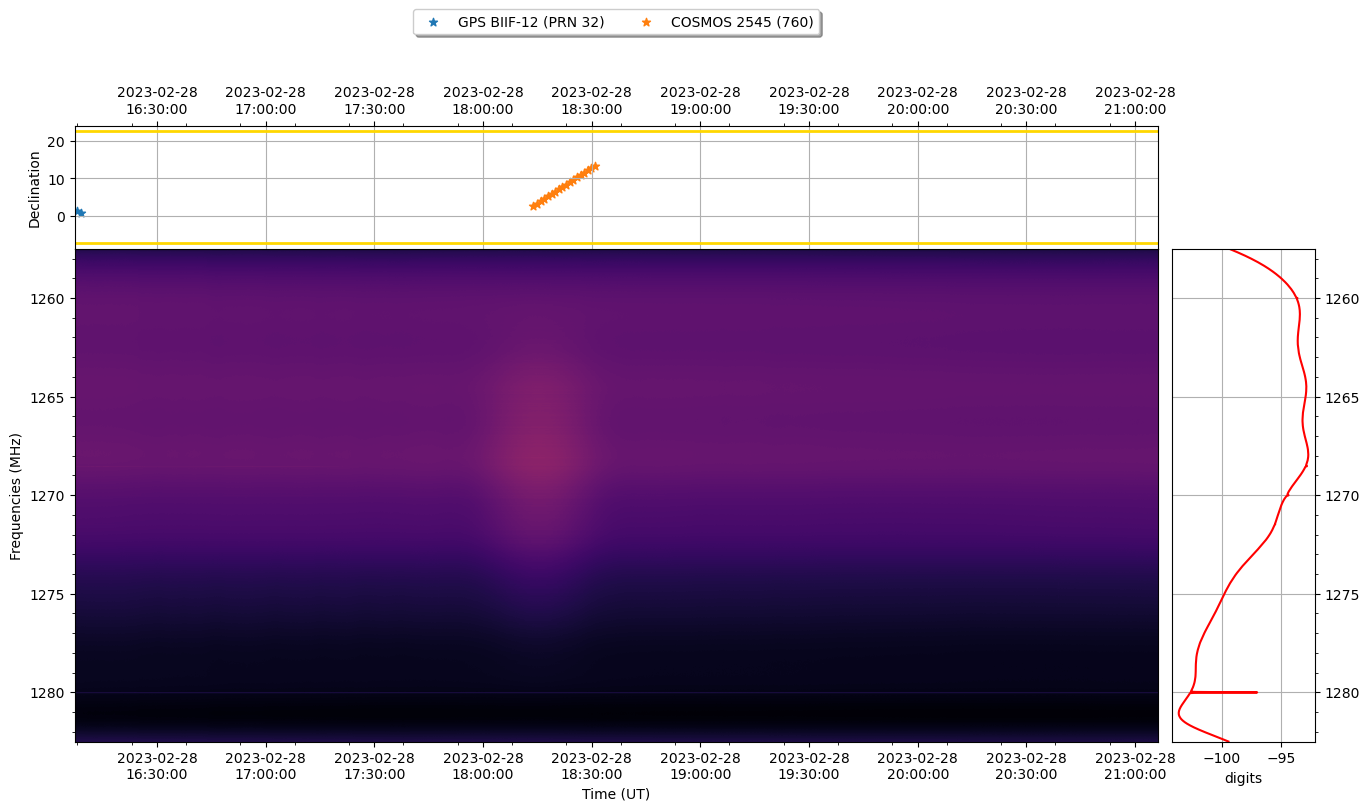

In [25]:
obs.make_sky().sky.plot_timeseries(obs.data);